# 🌞 Benin Solar Dataset - EDA
Prepared by: Feven Issayas  
Task: Data Profiling, Cleaning & Exploratory Analysis

## 🧾 Introduction

In this notebook, I will perform data profiling, cleaning, and exploratory data analysis (EDA) on the Benin solar energy dataset. The goal is to prepare this dataset for comparison and ranking in future tasks.

In [1]:
pip install pandas matplotlib seaborn numpy scipy windrose

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

sns.set(style='whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('togo.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 📊 Summary Statistics & Missing Values
We'll now look at basic descriptive statistics and missing value reports.

In [3]:
df.describe()

missing = df.isna().sum()
missing[missing > 0]

# >5% nulls
threshold = len(df) * 0.05
missing[missing > threshold]

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Comments    525600
dtype: int64

Comments    525600
dtype: int64

## 🚨 Outlier Detection and Cleaning
We’ll detect outliers using Z-score and clean missing values using the median.

In [4]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
df['outlier_flag'] = (np.abs(z_scores) > 3).any(axis=1)

# Impute missing with median
df[cols] = df[cols].apply(lambda x: x.fillna(x.median()))

# Drop rows with critical nulls
df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)

df.to_csv('togo_clean.csv', index=False)

## 🗓️ Time Series Analysis
Let’s explore how solar irradiance and temperature vary over time.

<Axes: title={'center': 'GHI Over Time'}, xlabel='Timestamp'>

<Axes: title={'center': 'DNI Over Time'}, xlabel='Timestamp'>

<Axes: title={'center': 'DHI Over Time'}, xlabel='Timestamp'>

<Axes: title={'center': 'Tamb Over Time'}, xlabel='Timestamp'>

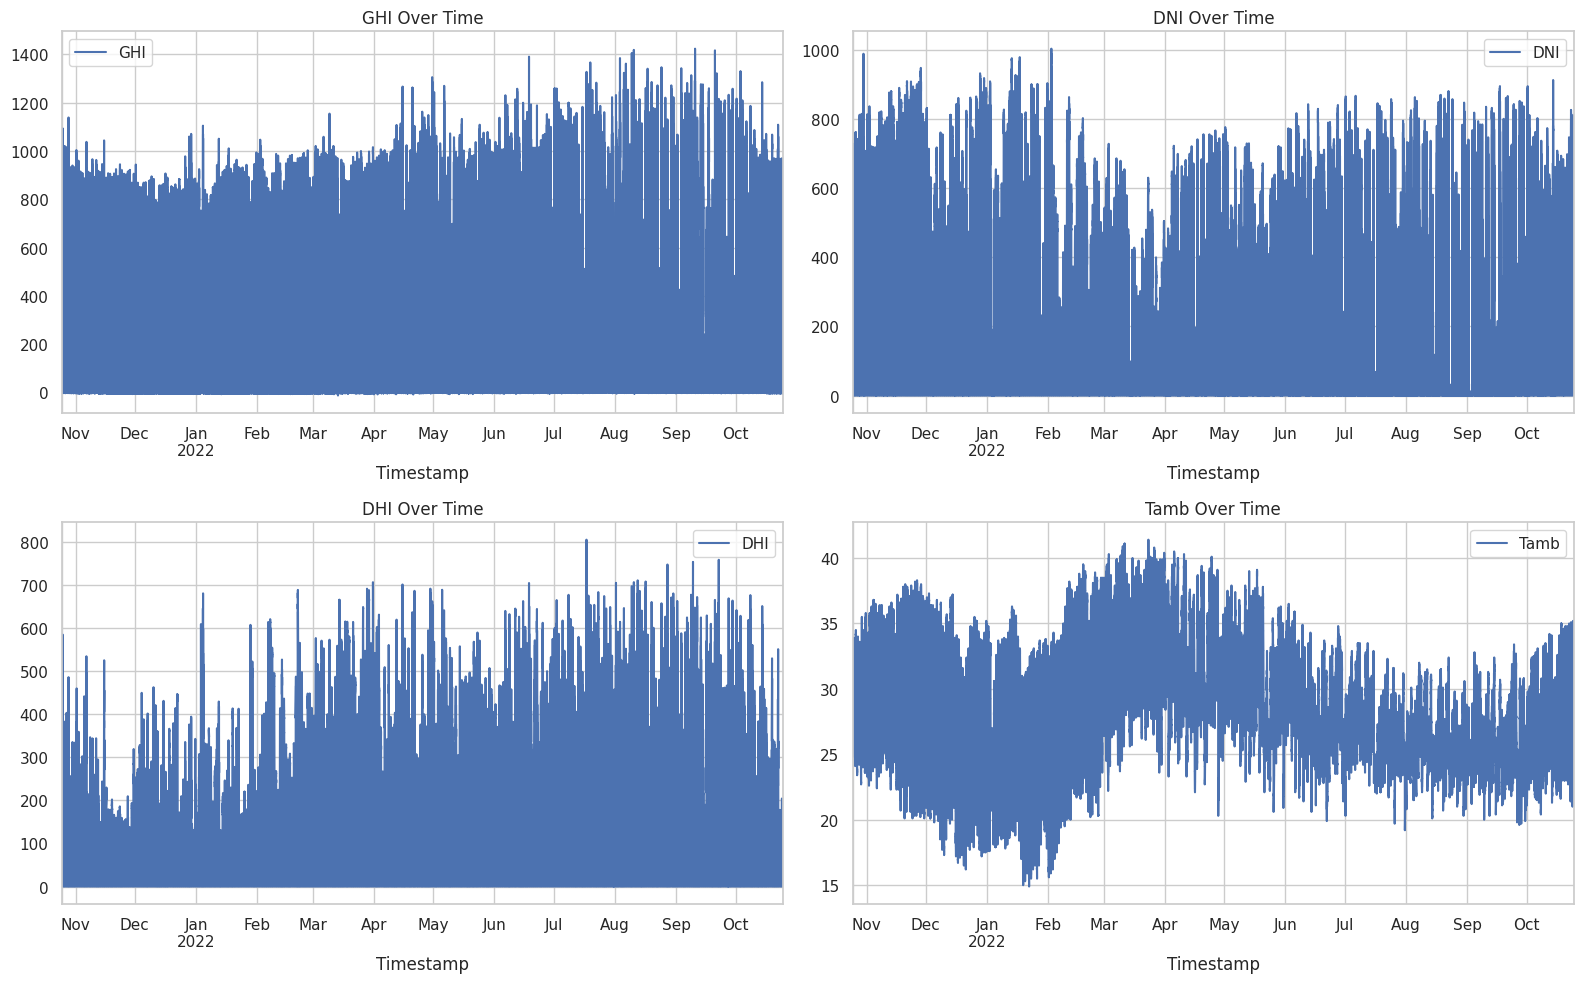

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
df.plot(x='Timestamp', y='GHI', ax=axs[0,0], title='GHI Over Time')
df.plot(x='Timestamp', y='DNI', ax=axs[0,1], title='DNI Over Time')
df.plot(x='Timestamp', y='DHI', ax=axs[1,0], title='DHI Over Time')
df.plot(x='Timestamp', y='Tamb', ax=axs[1,1], title='Tamb Over Time')
plt.tight_layout()

## 🧼 Cleaning Impact on Sensors
Compare ModA & ModB before vs after removing outliers

<Axes: xlabel='outlier_flag'>

Text(0.5, 1.0, 'Average ModA and ModB with and without Outliers')

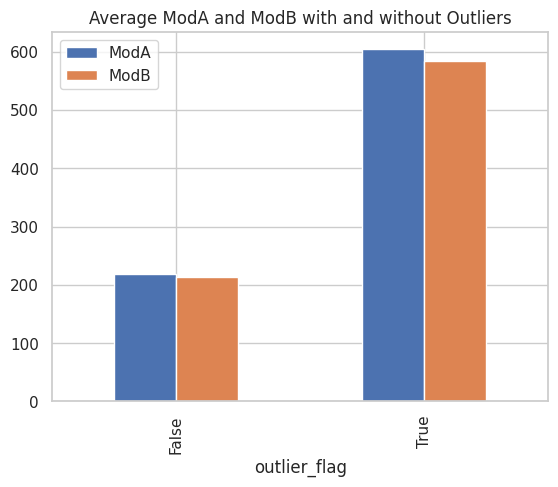

In [6]:
df.groupby('outlier_flag')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA and ModB with and without Outliers")

## 🔗 Correlation & Relationships
We'll now explore relationships between key variables using a heatmap and scatter plots.

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

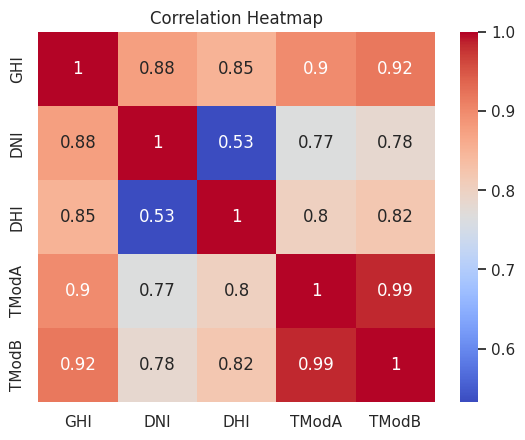

<Axes: xlabel='WS', ylabel='GHI'>

Text(0.5, 1.0, 'WS vs GHI')

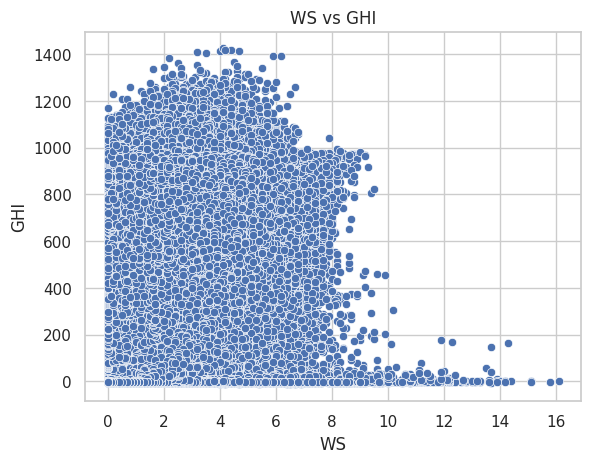

In [7]:
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs GHI')
plt.show()

## 💨 Wind Analysis & Histograms
Wind rose diagram and frequency distribution of GHI and WS.

<Figure size 640x480 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'GHI Distribution')

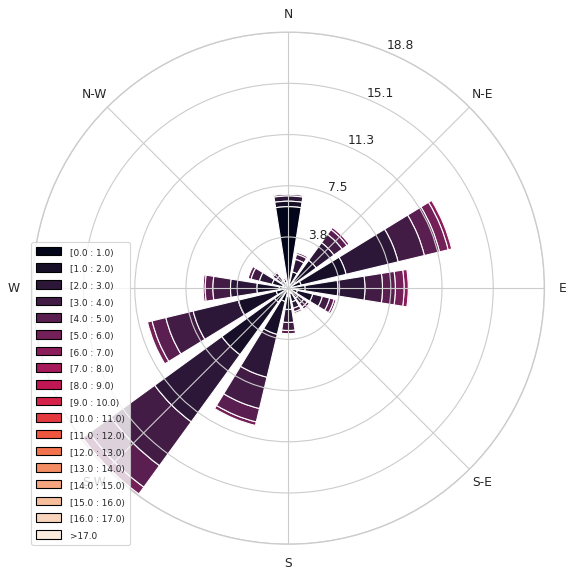

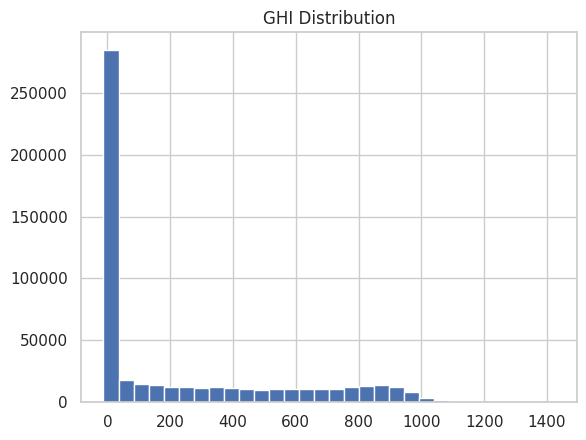

<Figure size 640x480 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Wind Speed Distribution')

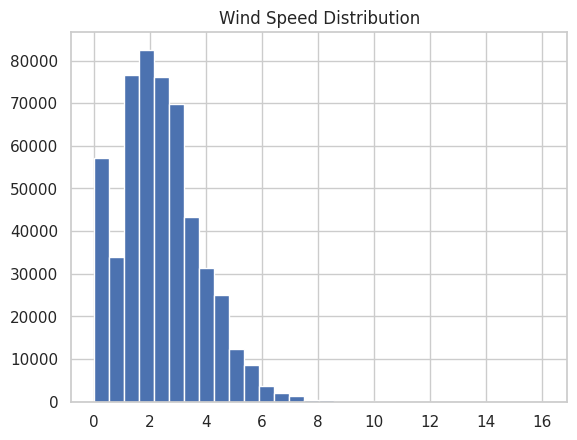

In [8]:
# Plot Windrose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], bins=np.arange(0, max(df['WS'])+1, 1), opening=0.8, edgecolor='white', normed=True)
ax.set_legend()

# Reset for next plot
plt.figure()
df['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()

plt.figure()
df['WS'].hist(bins=30)
plt.title('Wind Speed Distribution')
plt.show()


## 🌡️ Temperature vs Humidity
Check the influence of RH on temperature and solar radiation.

Text(0.5, 1.0, 'RH vs Tamb')

Text(0.5, 1.0, 'RH vs GHI')

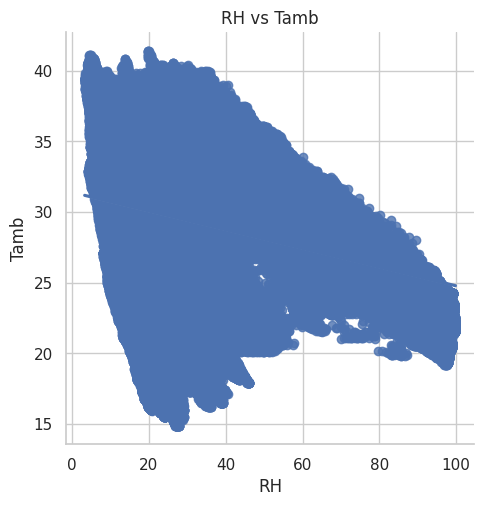

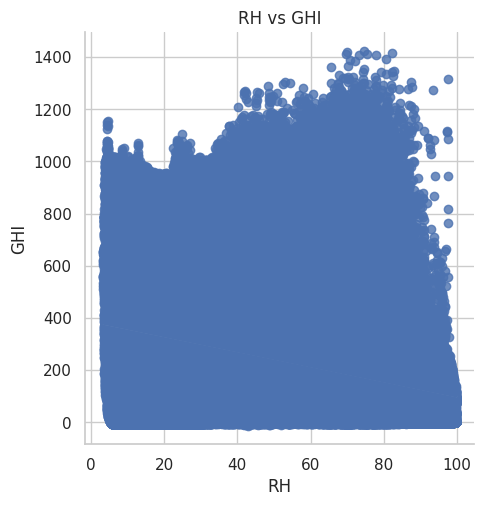

In [9]:
sns.lmplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Tamb')

sns.lmplot(x='RH', y='GHI', data=df)
plt.title('RH vs GHI')

## 🫧 Bubble Chart
Bubble size represents RH while comparing GHI and Tamb.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='skyblue', edgecolors='black')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb with RH as Size')

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'GHI')

Text(0, 0.5, 'Tamb')

Text(0.5, 1.0, 'Bubble Chart: GHI vs Tamb with RH as Size')

## 🧠 Insights & References

- GHI and DNI increase during midday hours.
- Relative humidity negatively correlates with temperature and solar radiation.
- Outlier removal has a notable impact on ModA and ModB readings.

**References:**
- [Seaborn Docs](https://seaborn.pydata.org/)
- [Windrose in Python](https://github.com/python-windrose/windrose)